In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# Import data
obs_A = pd.read_parquet("../../preprocessing/data/obs_A.parquet")
est_A = pd.read_parquet("../../preprocessing/data/est_A.parquet")
test_A = pd.read_parquet("../../preprocessing/data/test_A.parquet")

obs_B = pd.read_parquet("../../preprocessing/data/obs_B.parquet")
est_B = pd.read_parquet("../../preprocessing/data/est_B.parquet")
test_B = pd.read_parquet("../../preprocessing/data/test_B.parquet")

obs_C = pd.read_parquet("../../preprocessing/data/obs_C.parquet")
est_C = pd.read_parquet("../../preprocessing/data/est_C.parquet")
test_C = pd.read_parquet("../../preprocessing/data/test_C.parquet")

In [38]:
# Concatenate data
A = pd.concat([obs_A, est_A, test_A], axis=0).dropna(subset=['pv_measurement'])
B = pd.concat([obs_B, est_B, test_B], axis=0).dropna(subset=['pv_measurement'])
C = pd.concat([obs_C, est_C, test_C], axis=0).dropna(subset=['pv_measurement'])

master_df = pd.concat([A, B, C], axis=0)

# Remove duplicate columns (keeping the first occurrence)
master_df = master_df.loc[:, ~master_df.columns.duplicated()]



In [39]:
# All columns
columns = [
    'pv_measurement', 'date_forecast', 'snow_accumulation',
    'total_radiation', 'sfc_pressure:hPa', 'month', 'year',
    'date_forecast_fft_amplitude', 'date_forecast_fft_phase',
    'sun_elevation:d_fft_amplitude', 'sun_elevation:d_fft_phase',
    'clear_sky_rad:W_rate_of_change', 'direct_rad:W_rate_of_change',
    'diffuse_rad:W_rate_of_change', 'total_radiation_rate_of_change',
    'effective_cloud_cover:p_rate_of_change', 'dew_or_rime:idx'
    'total_cloud_cover:p_rate_of_change', 'observed', 'sun_azimuth:d_lag_7',
    'sfc_pressure:hPa_lag_8', 't_1000hPa:K_lag_4', 'dew_or_rime:idx_lag_11',
    'relative_humidity_1000hPa:p_lag_-3', 'temp_dewpoint_diff_lag_-4',
    'dew_point_2m:K_lag_19', 'visibility:m_lag_-2', 'absolute_humidity_2m:gm3'
    't_1000hPa:K_rolling_avg_24', 'msl_pressure:hPa_rolling_avg_24',
    'msl_pressure:hPa', 'absolute_humidity_2m:gm3_rolling_avg_24',
    'total_cloud_cover:p_rolling_avg_6', 'total_radiation_rolling_avg_3',
    'diffuse_rad:W', 'diffuse_rad_1h:J', 'direct_rad:W', 'direct_rad_1h:J',
    'clear_sky_rad:W', 'sun_elevation:d', 't_1000hPa:K',
    'dew_point_2m:K', 'effective_cloud_cover:p', 'clear_sky_energy_1h:J',
    'sun_elevation_direct_rad_interaction', 'humidity_temp_interaction',
    'temp_rad_interaction', 'air_density_2m:kgm3', 'msl_pressure:hPa_lag_3',
    'total_cloud_cover:p', 't_1000hPa:K_rate_of_change', 'wind_vector_magnitude',
    'average_wind_speed', 'visibility:m', 'pressure_gradient',
    'temp_dewpoint_diff', 'sun_elevation:d_rolling_avg_6',
    'super_cooled_liquid_water:kgm2', 'relative_humidity_1000hPa:p',
    'is_day:idx', 'is_in_shadow:idx', 'pressure_50m:hPa', 'sun_azimuth:d',
    'snow_water:kgm2', 'precip_5min:mm', 'precip_type_5min:idx',
    'pressure_100m:hPa', 'rain_water:kgm2', 'snow_depth:cm',
    'snow_melt_10min:mm', 'prob_rime:p', 'wind_speed_w_1000hPa:ms',
    'wind_speed_u_10m:ms', 'wind_speed_v_10m:ms', 'wind_speed_10m:ms',
    'fresh_snow_24h:cm', 'fresh_snow_12h:cm', 'fresh_snow_6h:cm',
    'fresh_snow_3h:cm', 'fresh_snow_1h:cm', 'elevation:m',
    'ceiling_height_agl:m', 'cloud_base_agl:m', 'snow_density:kgm3',
    'snow_drift:idx'
]

# Variables related to the photovoltaic (PV) measurements and forecasts
pv_columns = [
    'pv_measurement', 'date_forecast', 'total_radiation',
    'date_forecast_fft_amplitude', 'date_forecast_fft_phase',
    'total_radiation_rate_of_change', 'total_radiation_rolling_avg_3'
]

# Variables related to snow measurements
snow_columns = [
    'pv_measurement', 'snow_accumulation', 'snow_water:kgm2', 'fresh_snow_24h:cm',
    'fresh_snow_12h:cm', 'fresh_snow_6h:cm', 'fresh_snow_3h:cm',
    'fresh_snow_1h:cm', 'snow_depth:cm', 'snow_melt_10min:mm',
    'snow_density:kgm3'
]

# Variables related to atmospheric pressure
pressure_columns = [
    'pv_measurement', 'sfc_pressure:hPa', 'msl_pressure:hPa', 'msl_pressure:hPa_lag_3',
    'pressure_gradient', 'pressure_50m:hPa', 'pressure_100m:hPa'
]

# Variables related to cloud cover and related phenomena
cloud_columns = [
    'pv_measurement', 'effective_cloud_cover:p', 'total_cloud_cover:p',
    'effective_cloud_cover:p_rate_of_change',
    'total_cloud_cover:p_rate_of_change', 'total_cloud_cover:p_rolling_avg_6',
    'ceiling_height_agl:m', 'cloud_base_agl:m', 'prob_rime:p',
    'super_cooled_liquid_water:kgm2'
]

# Variables related to temperature
temperature_columns = [
    'pv_measurement', 't_1000hPa:K', 'dew_point_2m:K', 'temp_dewpoint_diff',
    't_1000hPa:K_lag_4', 'temp_dewpoint_diff_lag_-4',
    't_1000hPa:K_rolling_avg_24', 't_1000hPa:K_rate_of_change'
]

# Variables related to humidity
humidity_columns = [
    'pv_measurement', 'dew_or_rime:idx', 'relative_humidity_1000hPa:p', 'humidity_temp_interaction',
    'absolute_humidity_2m:gm3', 'absolute_humidity_2m:gm3_rolling_avg_24'
]

# Variables related to wind
wind_columns = [
    'pv_measurement', 'wind_speed_10m:ms', 'wind_speed_u_10m:ms', 'wind_speed_v_10m:ms',
    'wind_speed_w_1000hPa:ms', 'wind_vector_magnitude', 'average_wind_speed'
]

# Variables related to solar radiation
solar_columns = [
    'pv_measurement', 'sun_elevation:d', 'sun_azimuth:d', 'sun_elevation:d_fft_amplitude',
    'sun_elevation:d_fft_phase', 'sun_elevation:d_rolling_avg_6',
    'sun_elevation_direct_rad_interaction', 'clear_sky_rad:W',
    'clear_sky_rad:W_rate_of_change', 'clear_sky_energy_1h:J',
    'direct_rad:W', 'direct_rad:W_rate_of_change', 'direct_rad_1h:J',
    'diffuse_rad:W', 'diffuse_rad:W_rate_of_change', 'diffuse_rad_1h:J'
]

# Variables related to visibility and atmospheric phenomena
visibility_columns = [
    'pv_measurement', 'visibility:m', 'visibility:m_lag_-2', 'is_day:idx', 'is_in_shadow:idx',
    'ceiling_height_agl:m', 'cloud_base_agl:m'
]

# Variables related to precipitation
precipitation_columns = [
    'pv_measurement', 'precip_5min:mm', 'precip_type_5min:idx', 'rain_water:kgm2',
    'snow_melt_10min:mm'
]

# Miscellaneous time-related or lagged variables
time_lagged_columns = [
    'pv_measurement', 'sun_azimuth:d_lag_7', 'sfc_pressure:hPa_lag_8', 'dew_or_rime:idx_lag_11',
    'relative_humidity_1000hPa:p_lag_-3', 'msl_pressure:hPa_lag_3'
]

# Add any additional or missing columns as needed
miscellaneous_columns = [
    'pv_measurement', 'month', 'year', 'elevation:m', 'snow_drift:idx', 'observed'
]


In [40]:
best_columns = [
    'pv_measurement'
]

/Users/mathiasotnes/anaconda3/envs/TDT4173-MPC/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


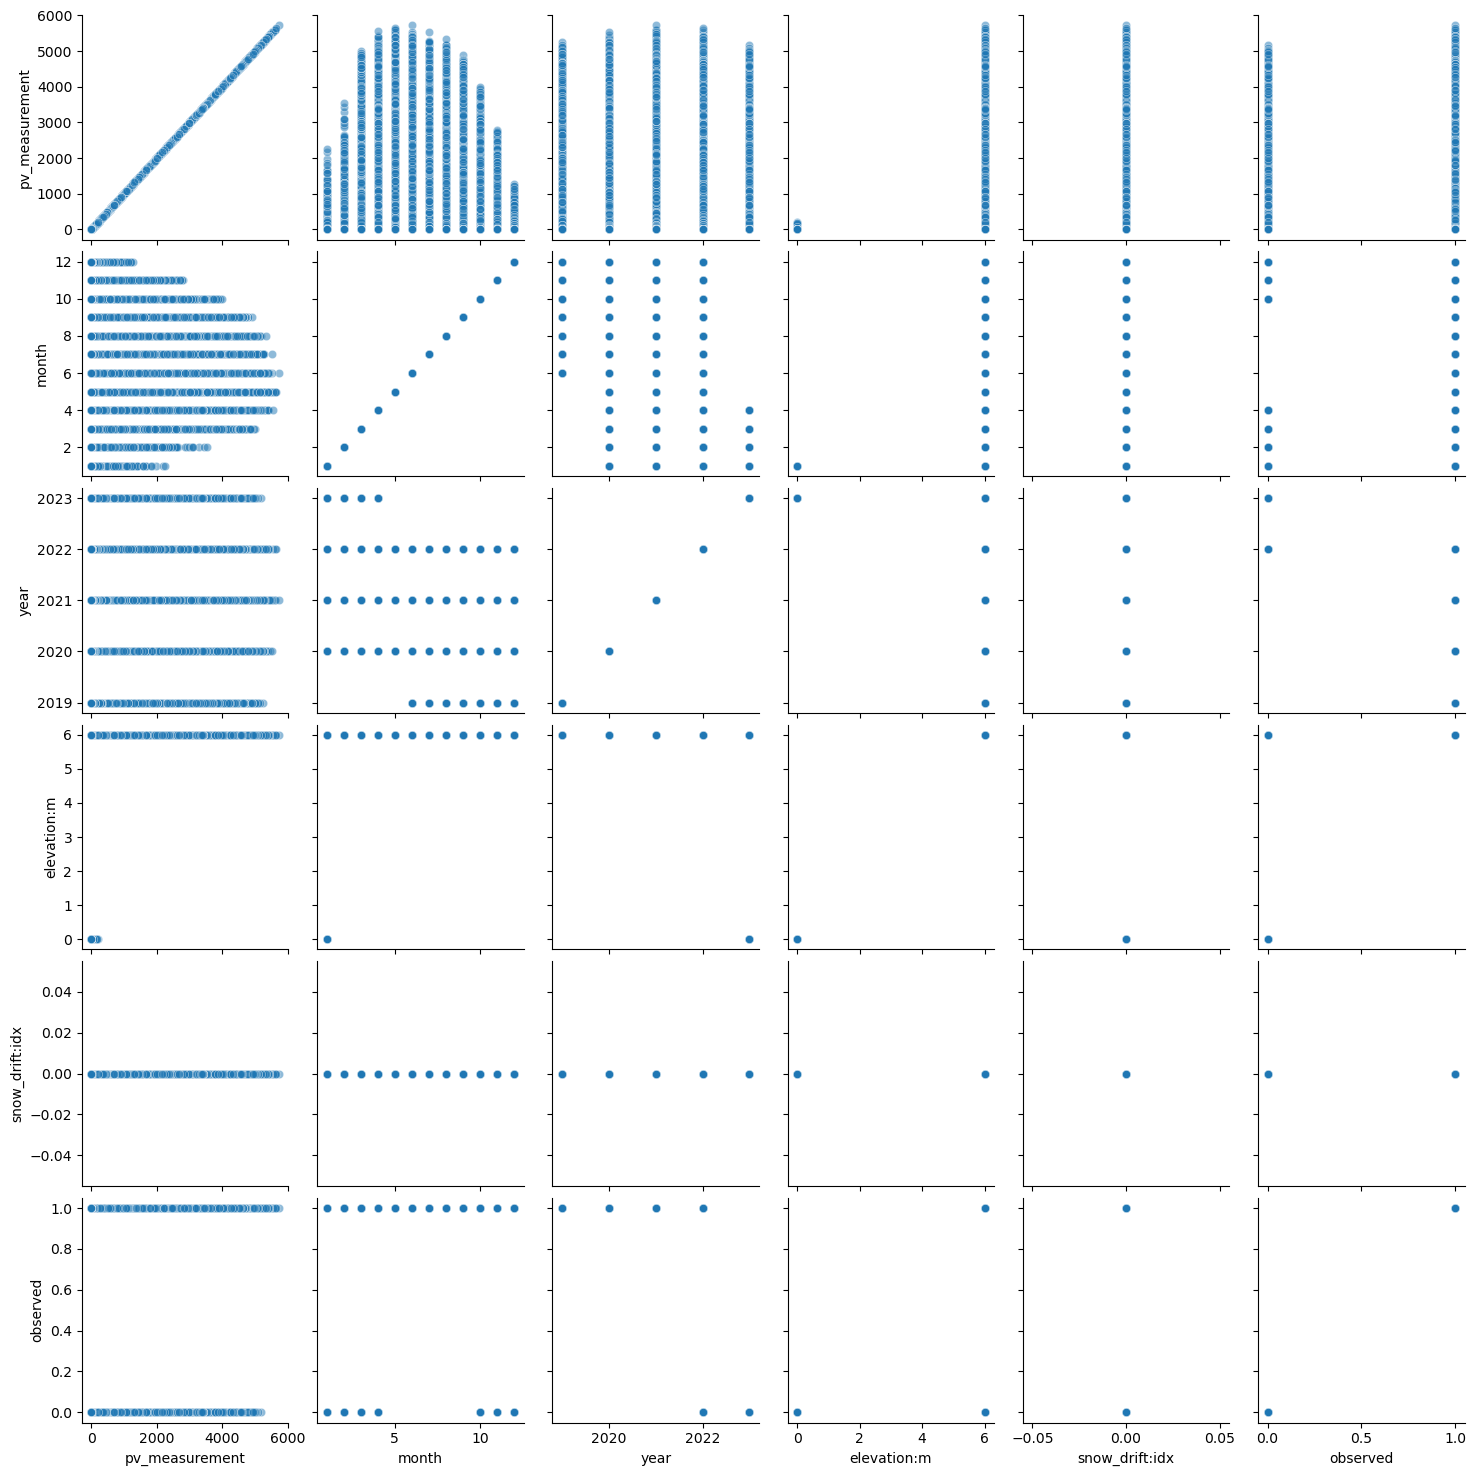

In [47]:
# Possible column groups are
#   - pv_columns
#   - snow_columns
#   - pressure_columns
#   - cloud_columns
#   - temperature_columns
#   - humidity_columns
#   - wind_columns
#   - solar_columns
#   - visibility_columns
#   - precipitation_columns
#   - time_lagged_columns
#   - miscellaneous_columns

# Select dataset and columns to plot
df = A
columns_to_plot = miscellaneous_columns

# Plot
sns.pairplot(df, vars=columns_to_plot, diag_kind=None, plot_kws={"alpha": 0.5})
plt.savefig("pairplots/miscellaneous_columns.png")
plt.show()